In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('Dataset.csv')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61250,21139,2,165,90.0,150,100,3,2,0,0,1,1
1,8444,15946,2,173,70.0,120,80,1,1,0,0,1,1
2,47236,21255,1,148,67.0,130,80,1,1,0,0,1,0
3,49559,22739,1,155,52.0,120,80,1,1,0,0,1,1
4,84574,16761,1,164,68.0,110,70,1,1,0,0,1,1


In [72]:
# Split the data into features (X) and target variable (y)
X = data.drop('cardio', axis=1)
y = data['cardio']


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [75]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

print('Train Accuracy:', knn_train_acc)
print('Test Accuracy:', knn_test_acc)

Train Accuracy: 0.71625
Test Accuracy: 0.556984126984127


## Initially, we got Training accuracy: 71.625% and Testing accuracy: 55.69%

In [76]:
## After Preprocessing, we got a newdataset namely; preprocessed_data, now we will perform accuracy test on that data

In [77]:
data = pd.read_csv('preprocessed_data.csv')
data.head()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_class,cardio
0,21242,63,0,155,65.0,120,80,3,1,0,0,1,27.055151,3,1
1,85580,59,0,167,75.0,110,70,2,1,0,0,1,26.892323,3,0
2,28012,54,1,168,106.0,140,90,2,1,0,0,1,37.556689,5,1
3,31280,52,0,163,83.0,110,70,1,1,0,0,1,31.239414,4,0
4,87151,54,0,158,59.0,100,70,2,2,0,0,1,23.634033,2,0


In [78]:
# Split the data into features (X) and target variable (y)
Xp = data.drop('cardio', axis=1)
yp = data['cardio']


In [79]:
from sklearn.model_selection import train_test_split
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.2, random_state=0)

In [80]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xp_train, yp_train)

yp_pred_train = model.predict(Xp_train)
yp_pred_test = model.predict(Xp_test)

knn_train_acc_p = accuracy_score(yp_train, yp_pred_train)
knn_test_acc_p = accuracy_score(yp_test, yp_pred_test)

print('Train Accuracy:', knn_train_acc_p)
print('Test Accuracy:', knn_test_acc_p)

Train Accuracy: 0.764093704366426
Test Accuracy: 0.6307996051332675


In [81]:
# In the preprocessed data, accuracy improved ie. Train Accuracy: 0.764093704366426, Test Accuracy: 0.6307996051332675

## Hyperparameter tuning

In [82]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [83]:
# Creating classifiers for every value of K
classifiers = []
nb_neighbor = [1, 5, 10, 20, 30, 40, 50]
for i in range(len(nb_neighbor)):
    classifiers.append(KNeighborsClassifier(nb_neighbor[i]))

# Initializing the lists for accuracy, true positive rate and true negative rate
# Later used to compare the classifiers for different values of K
score_list = []
true_positive = []
true_negative = []
# Fitting the training dataset for every classifier and calculating metrics

index = 0
for clf in classifiers: 
    clf.fit(Xp_train,yp_train)

    score = clf.score(Xp_test, yp_test)    
    yp_pred = clf.predict(Xp_test)
    
    print(f"Accuracy for K =", nb_neighbor[index] ,"nearest Neighbors: ",  accuracy_score(yp_test, yp_pred))

    
    cm = confusion_matrix(yp_test, yp_pred) # Confusion matrix  

    score_list.append(score)
    true_positive.append(cm[1][1])
    true_negative.append(cm[0][0])
    
    index = index + 1

Accuracy for K = 1 nearest Neighbors:  0.5979763079960513
Accuracy for K = 5 nearest Neighbors:  0.6307996051332675
Accuracy for K = 10 nearest Neighbors:  0.6282494241526818
Accuracy for K = 20 nearest Neighbors:  0.6218328397499178
Accuracy for K = 30 nearest Neighbors:  0.6052155314248108
Accuracy for K = 40 nearest Neighbors:  0.5932872655478776
Accuracy for K = 50 nearest Neighbors:  0.5764231655149721


<Figure size 1100x900 with 0 Axes>

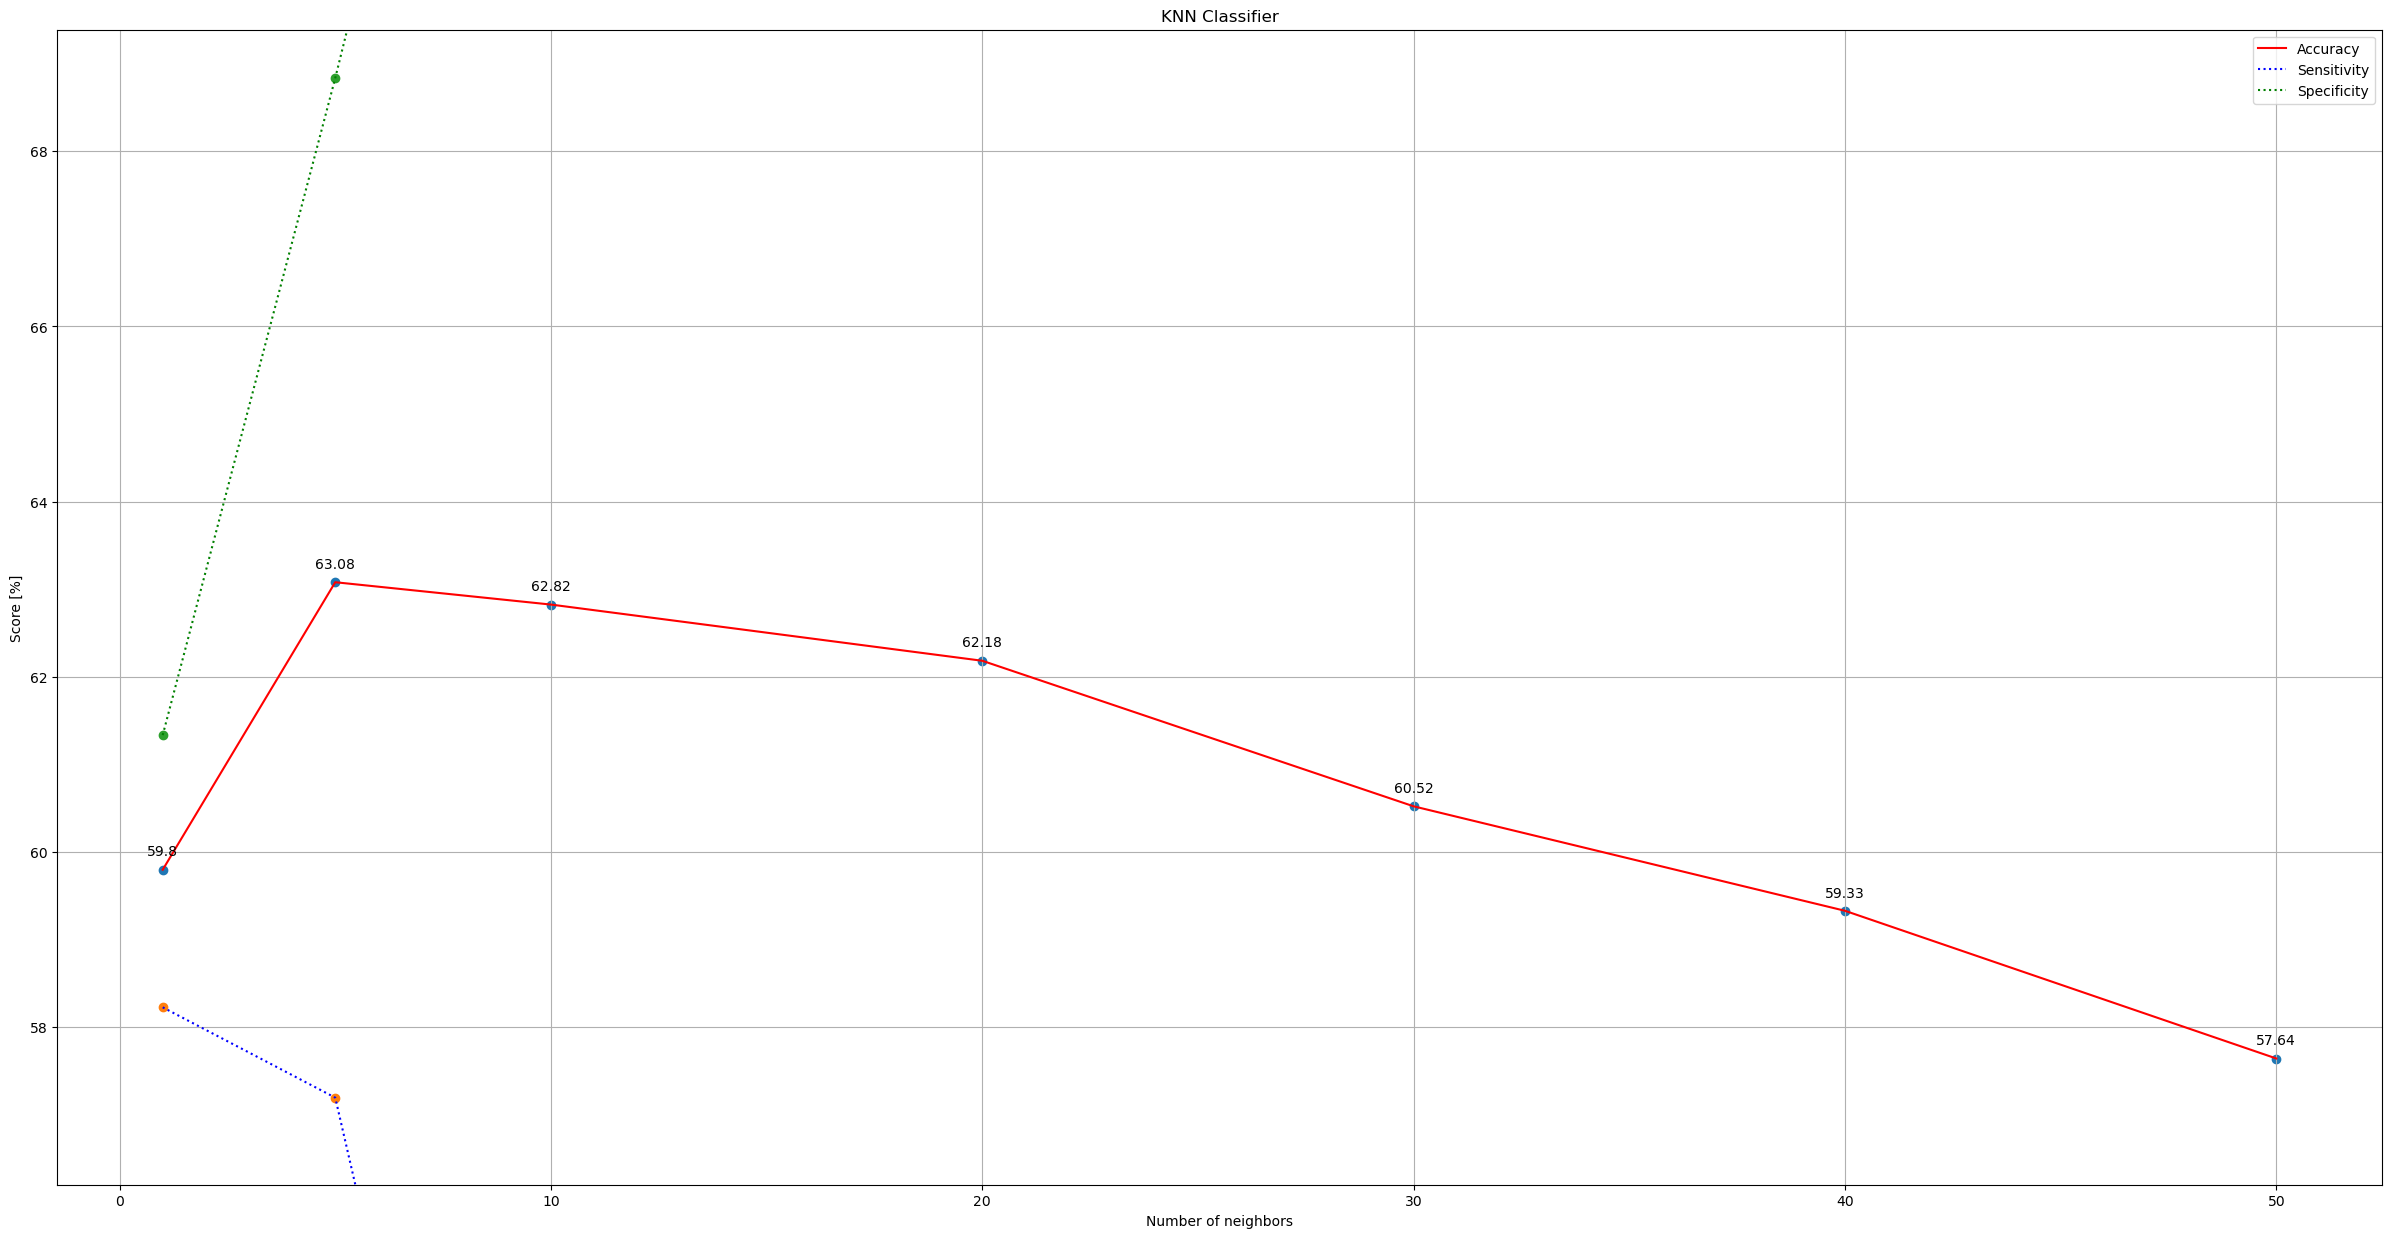

In [84]:
# Visualization of the results
plt.figure(figsize=(11, 9))
fig, ax = plt.subplots(figsize=(30,15))
ax = ax
score_list = np.array(score_list)
score_list_plot = score_list * 100
true_positive_plot = np.array(true_positive)/sum(yp_test) * 100
true_negative_plot = np.array(true_negative)/(len(yp_test)-sum(yp_test)) * 100
plt.plot(nb_neighbor, score_list_plot,  'r-')
plt.plot(nb_neighbor, true_positive_plot, 'b:')
plt.plot(nb_neighbor, true_negative_plot, 'g:')
plt.scatter(nb_neighbor, score_list_plot)
plt.scatter(nb_neighbor, true_positive_plot)
plt.scatter(nb_neighbor, true_negative_plot)
for x,y in zip(nb_neighbor,score_list_plot):

    label = "{:.2f}".format(y)

    plt.annotate(str(round(y, 2)), # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.ylim(min(score_list_plot)* 0.975, max(score_list_plot)*1.1)
plt.xlabel('Number of neighbors')
plt.ylabel('Score [%]')
plt.title('KNN Classifier')
plt.legend(['Accuracy', 'Sensitivity', 'Specificity'])
plt.grid(True)
plt.show()

In [85]:
# we are getting the highest accuracy at k=5

The accuracy score of KNN is: 0.6307996051332675
Confusion matrix:
[[4422 1723]
 [3426 2585]]
Sensitivity (TPR): 0.4300449176509732

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.72      0.63      6145
           1       0.60      0.43      0.50      6011

    accuracy                           0.58     12156
   macro avg       0.58      0.57      0.57     12156
weighted avg       0.58      0.58      0.57     12156



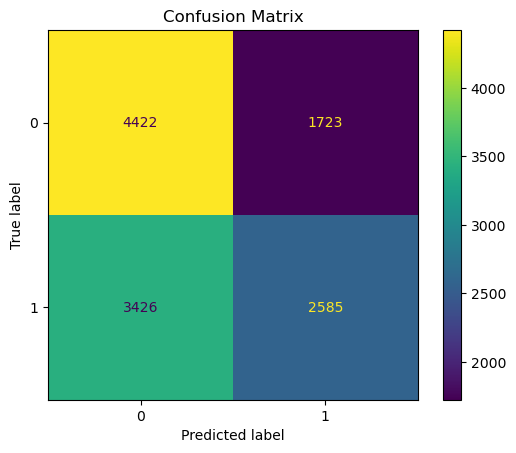

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Calculate accuracy score
knn_acc = accuracy_score(yp_test, yp_pred_test)
print('The accuracy score of KNN is:', knn_acc)

# Calculate confusion matrix
cm = confusion_matrix(yp_test, yp_pred)
print('Confusion matrix:')
print(cm)

# Calculate sensitivity (True Positive Rate)
tpr_knn = cm[1][1] / (cm[1][0] + cm[1][1])
print('Sensitivity (TPR):', tpr_knn)

# Generate classification report
print('\nClassification Report:')
print(classification_report(yp_test, yp_pred,zero_division=1))

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()
